In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/kaggle/input/new-sales-data/Sales_Data_New.csv')
df.head()

,order_date,order_number,order_warehouse_id,store_id,order_status,item_id,amount_per_unit,ordered_quantity,item_discount,expected_delivery_date
0,14/02/2023,23045429724,9.0,pY85faVkR6OCPZQ0CefuH,CLOSED,P437048134760065132,281.0,1,0.0,15/02/2023
1,19/02/2023,23050463841,21.0,6FTIDJ65jt1arkhJm2bbmL,CLOSED,P5801744203932,75.0,10,0.0,20/02/2023
2,20/02/2023,23051024482,4.0,7JQvKYYMMCSzfni42DKw5a,CLOSED,P810622842427393343,5420.0,1,0.0,21/02/2023
3,06/02/2023,23037635371,4.0,6tjBYLZoWt70PUXokHPEit,CANCELLED,P957287950450245066,2600.0,50,0.0,07/02/2023
4,15/02/2023,23046508076,15.0,1w0FMk0J5K43sIqSZv9b5t,CLOSED,P862686710671848219,85.0,15,0.0,16/02/2023


# Sales Revenue Over Time

/tmp/ipykernel_33/3702693612.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'])  # Convert order_date to datetime
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


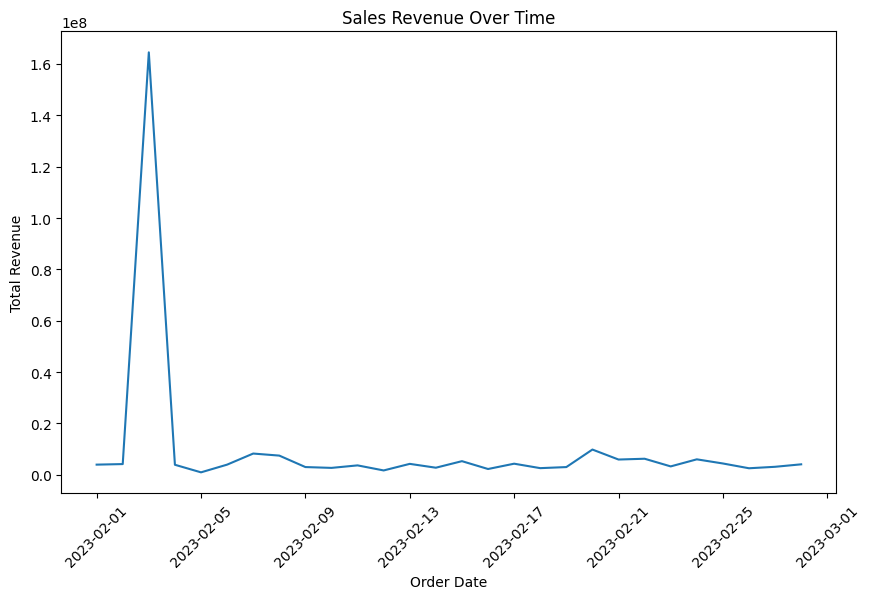

In [10]:

# Assuming your data is stored in a DataFrame called 'df'

# Sales Revenue Over Time
df['order_date'] = pd.to_datetime(df['order_date'])  # Convert order_date to datetime
df['total_revenue'] = df['amount_per_unit'] * df['ordered_quantity']  # Calculate total revenue for each order
revenue_over_time = df.groupby('order_date')['total_revenue'].sum().reset_index()  # Group by order date and sum up total revenue
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_over_time, x='order_date', y='total_revenue')
plt.title('Sales Revenue Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Total Revenue by Store

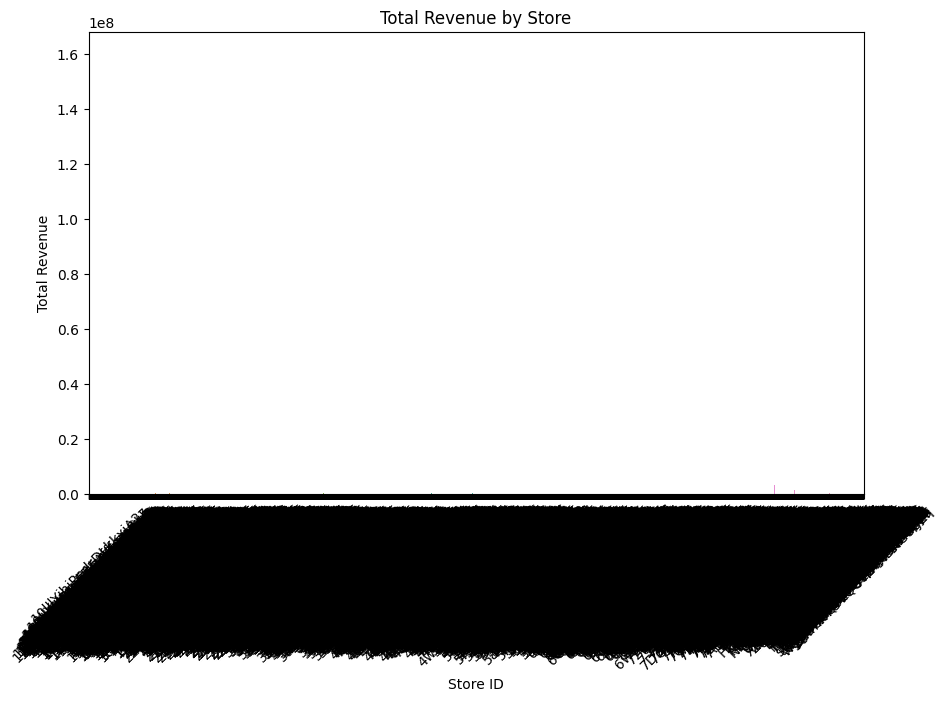

In [11]:
# Total Revenue by Store
total_revenue_by_store = df.groupby('store_id')['total_revenue'].sum().reset_index()  # Group by store_id and sum up total revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=total_revenue_by_store, x='store_id', y='total_revenue')
plt.title('Total Revenue by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Distribution of Orders by Warehouse

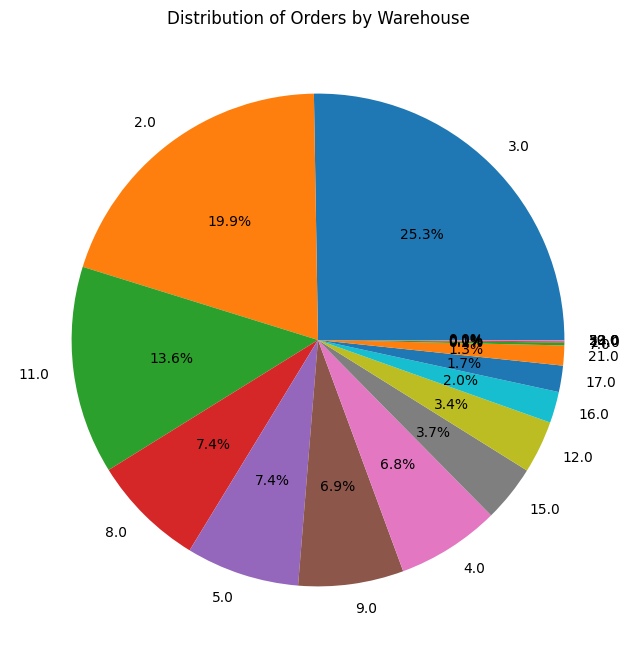

In [12]:
# Distribution of Orders by Warehouse
orders_by_warehouse = df['order_warehouse_id'].value_counts().reset_index()  # Count the number of orders for each warehouse
orders_by_warehouse.columns = ['Warehouse ID', 'Order Count']
plt.figure(figsize=(8, 8))
plt.pie(orders_by_warehouse['Order Count'], labels=orders_by_warehouse['Warehouse ID'], autopct='%1.1f%%')
plt.title('Distribution of Orders by Warehouse')
plt.show()